## D209 Data Mining 1 PA
##### Submitted By Edwin Perry
### Table of Contents
<ol>
    <li><a href="#A">Research Question</a></li>
    <li><a href="#B">Method Justification</a></li>
    <li><a href="#C">Data Preparation</a></li>
    <li><a href="#D">Analysis</a></li>
    <li><a href="#E">Data Summary and Implications</a></li>
    <li><a href="#F">Panopto Video</a></li>
</ol>

<a id="A"></a>
#### A: Research Question
##### 1. Providing the question
The research question I will be examining is "Can we use the data from a provided dataset to accurately classify whether or not a customer will churn?" This is relevant to the business interest of the company, as it will allow for a greater identification of customers likely to leave going forward, allowing the business to both prepare for lost customers and to take preventative action to retain customers
##### 2. Goal of Analysis
The goals for this analysis is to use a K-Nearest-Neighbors analysis (KNN) to determine which factors in the telecommunications dataset (independent/explanatory variables) correlate to customers leaving the business (the dependent/target variable). If the analysis can identify these factors, customers can be retained over longer periods of time, thus reducing the necessity of acquiring new customers or allowing for a higher number of concurrent customers, resulting in higher profitability for the business.

<a id="B"></a>
#### B: Method Justification
##### 1. Explaining Classification Method
K-nearest-neighbor (KNN) analysis is a supervised learning algorithm that predicts the target variable for a new sample based on the values of its nearest neighbors. The algorithm calculates the distance between the new sample and all existing samples, and then selects the K most similar samples (i.e., the nearest neighbors) to determine the predicted value. The predicted value is typically determined by a majority vote (for classification) or a weighted average (for regression) of the values of the K nearest neighbors. Once this model is created, I expect the model to be able to correctly identify customer churn, ideally with an accuracy of 90%, to help inform future decision making in the business.

##### 2. Summarizing Assumptions
There are multiple assumptions that are used when making a KNN model
<ul>
    <li>We assume that instances that are close together in feature space are likely to have similar outputs. That is, we need the independent variables to influence the dependent variable</li>
    <li>We assume that the training data is representative of the entirety of the data.</li>
    <li>We assume that the data points are independent of each other. That is, we need each row of the csv file provided to have entries that are not influenced by the other customers in the data set</li>
</ul>

##### 3. Packages Used
For this project, I will use Python, due to the simplicity of both the language as a whole and the libraries used to perform KNN analysis. The libraries that will be used for this are as follows:
<ul>
<li>sklearn.model_selection: to split the data into training and testing sets
</li>
<li>sklearn.neighbors: to create the KNN model
</li>
<li>sklearn.preprocessing: to scale the data
</li>
<li>sklearn.metrics: to evaluate the performance of the model 
</li>
<li>pandas: to ingest and manipulate data within dateframes
</li>
<li>Numpy: For mathematical operations within the dataset</li>
<li>Scipy: For calculating z-scores to remove outliers</li>
<li>sklearn.feature_selection: For determining the best value for K</li>
<li>matplotlib.pyplot: For creating data visualizations</li>
</ul>

In [286]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

<a id="C"></a>
#### C: Data Preparation
##### 1. Data Pre-processing Goal
One goal of the data pre-processing would be to engage in one-hot encoding. This process will replace categorical data that may be stored as strings, which would cause issues analyzing the data, with integer values instead. For example, the techie column is stored as strings of Yes or No, but using pandas get_dummies() function, we can convert the techie column into numeric values that make the data possible to analyze.
##### 2. Variable Identification
The following variables will be included in the initial data analysis
<ul>
<li>Churn: Categorical variable used to determine whether the customer has left the company within the past month. This will also be the dependent variable</li>
<li>Customer_id: Categorical variable, a key to distinguish between customers</li>
<li>Age: Numerical variable, used to determine the age of the customer as reported at sign up</li>
<li>Area: Categorical variable, the area type of the customer, with possible values of urban, suburban, and rural</li>
<li>Income: Numerical variable, the annual income of the customer as reported at sign-up</li>
<li>Marital: Categorical variable, the marital status of the customer</li>
<li>Gender: Categorical variable, the gender of the customer</li>
<li>Email: Numerical variable, the number of emails sent to the customer within the last year</li>
<li>Contacts: Numerical variable, the number of times the customer has contacted customer support</li>
<li>Tenure: Numerical variable, the number of months the customer has stayed with his provider</li>
<li>MonthlyCharge: Numerical variable, the amount charged to the customer monthly</li>
<li>Bandwidth_GB_Year: Numerical variable, the amount of data used in a year</li>
</ul>

##### 3. Analysis Steps
In this first step, we are going to ingest the data and remove any columns that are not required for the data analysis.

In [287]:
data = pd.read_csv("/home/edwinp/Downloads/d9rkejv84kd9rk30fi2l/churn_clean.csv")
pd.set_option("display.max_columns", None)
data = data.filter(['Churn', 'Customer_id', 'Age', 'Area', 'Income', 'Marital', 'Gender', 'Email', 'Contacts', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])
print(data.head())

  Churn Customer_id  Age      Area    Income    Marital  Gender  Email  \
0    No     K409198   68     Urban  28561.99    Widowed    Male     10   
1   Yes     S120509   27     Urban  21704.77    Married  Female     12   
2    No     K191035   50     Urban   9609.57    Widowed  Female      9   
3    No      D90850   48  Suburban  18925.23    Married    Male     15   
4   Yes     K662701   83  Suburban  40074.19  Separated    Male     16   

   Contacts     Tenure  MonthlyCharge  Bandwidth_GB_Year  
0         0   6.795513     172.455519         904.536110  
1         0   1.156681     242.632554         800.982766  
2         0  15.754144     159.947583        2054.706961  
3         2  17.087227     119.956840        2164.579412  
4         2   1.670972     149.948316         271.493436  


In this next step, we will filter out any entries that are missing values in categorical columns, and replace missing numerical values with the median of their columns

In [288]:
data['Income'].fillna(data['Income'].median(), inplace=True)
data["Tenure"].fillna(data["Tenure"].median(), inplace=True)
data["MonthlyCharge"].fillna(data["MonthlyCharge"].median(), inplace=True)
data["Email"].fillna(data["Email"].median(), inplace=True)
data["Contacts"].fillna(data["Contacts"].median(), inplace=True)
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Bandwidth_GB_Year"].fillna(data["Bandwidth_GB_Year"].median(), inplace=True)
data.dropna(how='any',inplace=True)

/tmp/ipykernel_9330/2482320639.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)
/tmp/ipykernel_9330/2482320639.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Next, we will filter out the outliers from the numerical columns. Anything with a Z-Score of greater than 3 or less than -3 will be removed

In [289]:
zscores = stats.zscore(data['Income'])
data['IncomeZScore'] = zscores
zscores = stats.zscore(data['Tenure'])
data['TenureZScore'] = zscores
zscores = stats.zscore(data['MonthlyCharge'])
data['MonthlyChargeZScore'] = zscores
zscores = stats.zscore(data['Email'])
data['EmailZScore'] = zscores
zscores = stats.zscore(data['Contacts'])
data['ContactsZScore'] = zscores
zscores = stats.zscore(data['Age'])
data['AgeZScore'] = zscores
zscores = stats.zscore(data['Bandwidth_GB_Year'])
data['Bandwidth_GB_YearZScore'] = zscores
data = data.query("(IncomeZScore < 3 & IncomeZScore > -3) & (TenureZScore < 3 & TenureZScore > -3) & (MonthlyChargeZScore < 3 & MonthlyChargeZScore > -3) & (Bandwidth_GB_YearZScore < 3 & Bandwidth_GB_YearZScore > -3) & (EmailZScore < 3 & EmailZScore > -3) &  (AgeZScore < 3 & AgeZScore > -3) & (ContactsZScore < 3 & ContactsZScore > -3)")
data = data.drop(columns=['IncomeZScore', 'TenureZScore', 'MonthlyChargeZScore', 'EmailZScore', 'ContactsZScore', 'AgeZScore', 'Bandwidth_GB_YearZScore', 'Customer_id'])

Now, we will perform the one-hot encoding to numerical data. This is a required step to convert data stored in a textual format into a usable format for the KNN model. 

In [290]:
data = pd.get_dummies(data, columns=['Gender', 'Area', 'Marital'], dtype=int)
data["Churn"] = data["Churn"].apply(lambda x: 0 if x == "Yes" else 1)
print(data.head())

   Churn  Age    Income  Email  Contacts     Tenure  MonthlyCharge  \
0      1   68  28561.99     10         0   6.795513     172.455519   
1      0   27  21704.77     12         0   1.156681     242.632554   
2      1   50   9609.57      9         0  15.754144     159.947583   
3      1   48  18925.23     15         2  17.087227     119.956840   
4      0   83  40074.19     16         2   1.670972     149.948316   

   Bandwidth_GB_Year  Gender_Female  Gender_Male  Gender_Nonbinary  \
0         904.536110              0            1                 0   
1         800.982766              1            0                 0   
2        2054.706961              1            0                 0   
3        2164.579412              0            1                 0   
4         271.493436              0            1                 0   

   Area_Rural  Area_Suburban  Area_Urban  Marital_Divorced  Marital_Married  \
0           0              0           1                 0                0   


Next, we will scale the data, to ensure that all features contribute equally to the distance calculations, accounting for those factors with larger ranges.

In [291]:
df_X = data.drop(['Churn'], axis=1).copy()
df_y = data['Churn'].copy()
df_X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_X), columns=df_X.columns)

With this, our data is prepared. The exported data can be found in an attached csv, which is exported with the following code:

In [292]:
data = pd.concat([df_X.reset_index(drop=True), df_y.reset_index(drop=True)], axis=1)
data.to_csv('./D209CleanedData.csv')

<a id='D'></a>

#### D: Analysis
##### 1. Splitting the data



In [293]:
df_x = data.drop(['Churn'], axis=1).copy()
df_y = data['Churn'].copy()
X = df_x[["Tenure", 'Contacts', "Gender_Male", "Gender_Female", 'Gender_Nonbinary', 'Email', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Age']]
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state = 100, stratify = y)

X_train.to_csv('task1_Xtrain.csv', index=False)
X_test.to_csv('task1_Xtest.csv', index=False)
y_train.to_csv('task1_ytrain.csv', index=False)
y_test.to_csv('task1_ytest.csv', index=False)

##### 2. Technique Description
The first step to do in a KNN analysis is to identify an appropriate k value to ensure that we do not over or underfit. We will use GridSearchCV to test multiple values, and pick the value providing the most accurate model

In [294]:
grid = {'n_neighbors' : np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv = 5)
knn_cv.fit(X_train, y_train)
knn_cv.best_params_

{'n_neighbors': 49}

In [295]:
knn_cv.best_score_

0.8310722263092135

Now that we have the value of k as 49, we will perform the KNN classification, find an Area Under the Curve (AUC) score, and use code to determine the accuracy of the model

The confusion matrix for this KNN model:
Predicted No Churn | Predicted Churn
                 [289 222] Actual No Churn
                 [ 105 1320] Actual Churn
Training Accuracy: 0.8379181195918894.
Testing Accuracy: 0.831095041322314.


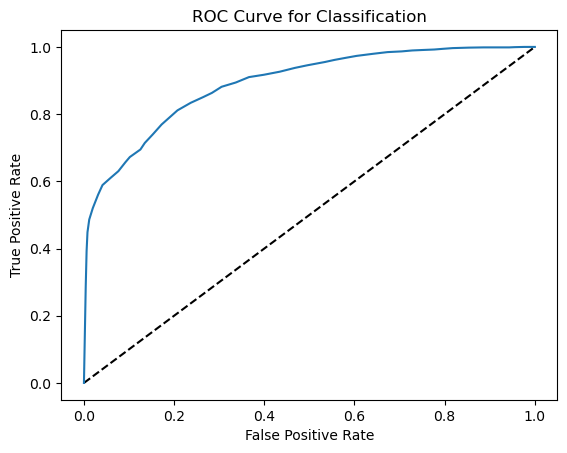

The Area Under the Curve (AUC) score is: 0.8902200707247573

              precision    recall  f1-score   support

           0       0.73      0.57      0.64       511
           1       0.86      0.93      0.89      1425

    accuracy                           0.83      1936
   macro avg       0.79      0.75      0.76      1936
weighted avg       0.82      0.83      0.82      1936



In [296]:
knn = KNeighborsClassifier(n_neighbors = 49)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)
print("The confusion matrix for this KNN model:")
print("Predicted No Churn | Predicted Churn")
print(f"                 {final_matrix[0]} Actual No Churn")
print(f"                 {final_matrix[1]} Actual Churn")
print(f"Training Accuracy: {knn.score(X_train, y_train)}.")
print(f"Testing Accuracy: {knn.score(X_test, y_test)}.")
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classification')
plt.show()
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")
print(classification_report(y_test, y_pred))

Overall, this model has correctly classified 1609 entries, as opposed to the incorrect 329, giving an accuracy of 83% when setting k = 49. Comparing this to the ROC curve, which represents the 50% likelihood of correct classification for random guessing, we see that the AUC score is significantly better, with an AUC score of 0.89

##### 3. Copy of Code
A copy of the code used to clean the data and create the model can be found in the following cell:

  Churn Customer_id  Age      Area    Income    Marital  Gender  Email  \
0    No     K409198   68     Urban  28561.99    Widowed    Male     10   
1   Yes     S120509   27     Urban  21704.77    Married  Female     12   
2    No     K191035   50     Urban   9609.57    Widowed  Female      9   
3    No      D90850   48  Suburban  18925.23    Married    Male     15   
4   Yes     K662701   83  Suburban  40074.19  Separated    Male     16   

   Contacts     Tenure  MonthlyCharge  Bandwidth_GB_Year  
0         0   6.795513     172.455519         904.536110  
1         0   1.156681     242.632554         800.982766  
2         0  15.754144     159.947583        2054.706961  
3         2  17.087227     119.956840        2164.579412  
4         2   1.670972     149.948316         271.493436  
   Churn  Age    Income  Email  Contacts     Tenure  MonthlyCharge  \
0      1   68  28561.99     10         0   6.795513     172.455519   
1      0   27  21704.77     12         0   1.156681     242.6

/tmp/ipykernel_9330/688429967.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)
/tmp/ipykernel_9330/688429967.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

The confusion matrix for this KNN model:
Predicted No Churn | Predicted Churn
                 [298 213] Actual No Churn
                 [ 116 1309] Actual Churn
Training Accuracy: 0.8392096086788067.
Testing Accuracy: 0.8300619834710744.


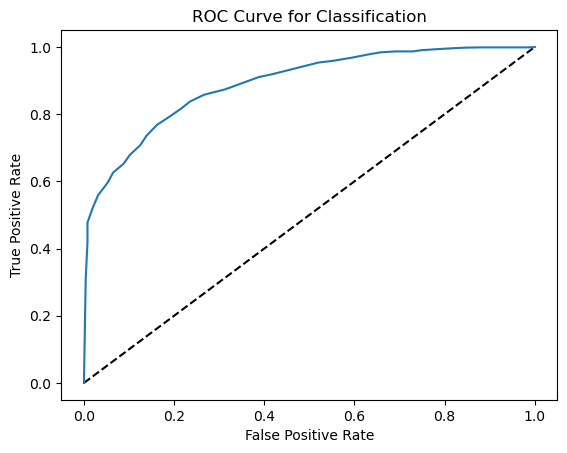

The Area Under the Curve (AUC) score is: 0.8903045284443987

              precision    recall  f1-score   support

           0       0.72      0.58      0.64       511
           1       0.86      0.92      0.89      1425

    accuracy                           0.83      1936
   macro avg       0.79      0.75      0.77      1936
weighted avg       0.82      0.83      0.82      1936



In [297]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
data = pd.read_csv("/home/edwinp/Downloads/d9rkejv84kd9rk30fi2l/churn_clean.csv")
pd.set_option("display.max_columns", None)
data = data.filter(['Churn', 'Customer_id', 'Age', 'Area', 'Income', 'Marital', 'Gender', 'Email', 'Contacts', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])
print(data.head())
data['Income'].fillna(data['Income'].median(), inplace=True)
data["Tenure"].fillna(data["Tenure"].median(), inplace=True)
data["MonthlyCharge"].fillna(data["MonthlyCharge"].median(), inplace=True)
data["Email"].fillna(data["Email"].median(), inplace=True)
data["Contacts"].fillna(data["Contacts"].median(), inplace=True)
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Bandwidth_GB_Year"].fillna(data["Bandwidth_GB_Year"].median(), inplace=True)
data.dropna(how='any',inplace=True)
zscores = stats.zscore(data['Income'])
data['IncomeZScore'] = zscores
zscores = stats.zscore(data['Tenure'])
data['TenureZScore'] = zscores
zscores = stats.zscore(data['MonthlyCharge'])
data['MonthlyChargeZScore'] = zscores
zscores = stats.zscore(data['Email'])
data['EmailZScore'] = zscores
zscores = stats.zscore(data['Contacts'])
data['ContactsZScore'] = zscores
zscores = stats.zscore(data['Age'])
data['AgeZScore'] = zscores
zscores = stats.zscore(data['Bandwidth_GB_Year'])
data['Bandwidth_GB_YearZScore'] = zscores
data = data.query("(IncomeZScore < 3 & IncomeZScore > -3) & (TenureZScore < 3 & TenureZScore > -3) & (MonthlyChargeZScore < 3 & MonthlyChargeZScore > -3) & (Bandwidth_GB_YearZScore < 3 & Bandwidth_GB_YearZScore > -3) & (EmailZScore < 3 & EmailZScore > -3) &  (AgeZScore < 3 & AgeZScore > -3) & (ContactsZScore < 3 & ContactsZScore > -3)")
data = data.drop(columns=['IncomeZScore', 'TenureZScore', 'MonthlyChargeZScore', 'EmailZScore', 'ContactsZScore', 'AgeZScore', 'Bandwidth_GB_YearZScore', 'Customer_id'])
data = pd.get_dummies(data, columns=['Gender', 'Area', 'Marital'], dtype=int)
data["Churn"] = data["Churn"].apply(lambda x: 0 if x == "Yes" else 1)
print(data.head())
df_X = data.drop(['Churn'], axis=1).copy()
df_y = data['Churn'].copy()
df_X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_X), columns=df_X.columns)
data = pd.concat([df_X.reset_index(drop=True), df_y.reset_index(drop=True)], axis=1)
data.to_csv('./D209CleanedData.csv')
df_x = data.drop(['Churn'], axis=1).copy()
df_y = data['Churn'].copy()
X = df_x[["Tenure", 'Contacts', "Gender_Male", "Gender_Female", 'Gender_Nonbinary', 'Email', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Age']]
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state = 100, stratify = y)

X_train.to_csv('task1_Xtrain.csv', index=False)
X_test.to_csv('task1_Xtest.csv', index=False)
y_train.to_csv('task1_ytrain.csv', index=False)
y_test.to_csv('task1_ytest.csv', index=False)
grid = {'n_neighbors' : np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv = 5)
knn_cv.fit(X_train, y_train)
knn_cv.best_params_
knn_cv.best_score_
knn = KNeighborsClassifier(n_neighbors = 40)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)
print("The confusion matrix for this KNN model:")
print("Predicted No Churn | Predicted Churn")
print(f"                 {final_matrix[0]} Actual No Churn")
print(f"                 {final_matrix[1]} Actual Churn")
print(f"Training Accuracy: {knn.score(X_train, y_train)}.")
print(f"Testing Accuracy: {knn.score(X_test, y_test)}.")
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classification')
plt.show()
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")
print(classification_report(y_test, y_pred))

<a id='E'></a>

#### E: Data Summary and Implications
##### 1. Accuracy and AUC
As mentioned before, the accuracy of the overall model is about 83% with an AUC score of 0.89. Though this score is significantly better than the ROC, which represents a 50% correct rate, a score of 83% is not ideal. The goal of any KNN analysis is to create a model that is as accurate, and as such, the model would have ideally been able to pass 90% accuracy in classification.

##### 2. Results and Implications
As this model has fairly high accuracy, it can be useful in classification. As such, using the remaining independent variables of Tenure, Gender_Male, Gender_Female, MonthlyCharge and Bandwidth_GB_Year customers can be analyzed to determine who is most likely to discontinue service with the telecommunications company, allowing the company to take proactive action to prevent their departure or prepare to acquire new customers to replace them. This will allow the business to minimize potential revenue losses that are likely to result from customers leaving
##### 3. Classification Limitations
This model has a few limiting aspects associated with it. The primary concern that I have with this model would be the class imbalance. We have a disparity of 4573 for the value count in the churn column, meaning we have many more customers that remained with the company rather than left. As such, the predictions may be biased going forward.
##### 4. Recommended Action
Overall, with the fairly high accuracy that this model shows, I would recommend using the model that was prepared to analyze the customers that are most likely to leave the company going forward. Even so, it is worth looking into ways to potentially improve the model, such as feeding a model data that had closer to a 50/50% distribution of churn, to avoid the class imbalance issue. Furthermore, it would be worth considering identifying other possible variables that might also have some sort of influence on customer churn, so that these variables might be used in a future model to drive more usable insights
#### F: Panopto Recording
A recording of the presentation of this code can be found at the following link: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=aca838ee-a1eb-4439-a760-b1d9001fa373
#### G: Code References
<a href = "https://campus.datacamp.com/courses/machine-learning-with-scikit-learn/fine-tuning-your-model?ex=9">DataCamp Class Material by Hugo Bowne-Anderson (Hyperparameter Tuning)</a> was used for the the code to find the best value of k for the actual KNN classification.

<a href= "https://campus.datacamp.com/courses/machine-learning-with-scikit-learn/fine-tuning-your-model?ex=8">DataCamp class material by Hugo Bowne-Anderson (AUC Computation)</a> was used for the code explaining how to compute the AUC score for my KNN model.

<a href="https://campus.datacamp.com/courses/machine-learning-with-scikit-learn/fine-tuning-your-model?ex=5"> DataCamp class material by Hugo Bowne-Anderson (Plotting an ROC Curve)</a> was used for the code to plot the ROC curve, to visualize the AUC score and the KNN model's performance

#### H: Source References
<a  href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">Scikit learn documentation for KNeighborsClassifier</a> was used for research into the weights and algorithms underpinning KNN classification. 